In [ ]:
Загрузите датасет transaction_data.csv. 
Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

Какие значения находятся в колонке transaction? 
Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. 
Подумайте, как можно улучшить график.

Сколько транзакций завершились ошибкой?

Сколько успешных транзакций осуществил каждый из пользователей? 
Постройте гистограмму распределения числа успешных транзакций.

Коллега прислал Вам обновленные данные. (transaction_data_updated.csv)
Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена
пользователей, строк – минуты, значений – число совершенных операций в указанную минуту.
Пропущенные значения заполните нулями.

Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, 
прошедших с начала дня, в колонку true_minute.

In [ ]:
Загрузите датасет transaction_data.csv. 
Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transaction_data = pd.read_csv("C:/Users/yana2/Рабочий стол/transaction_data.csv")

In [3]:
transaction_data

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


In [4]:
transaction_data.dtypes

date           object
name           object
transaction    object
dtype: object

In [16]:
transaction_data.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [8]:
transaction_data.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [ ]:
Какие значения находятся в колонке transaction? 
Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. 
Подумайте, как можно улучшить график.
Сколько транзакций завершились ошибкой?

In [20]:
trans_distr = transaction_data.transaction.value_counts()
trans_distr

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

<AxesSubplot:ylabel='transaction'>

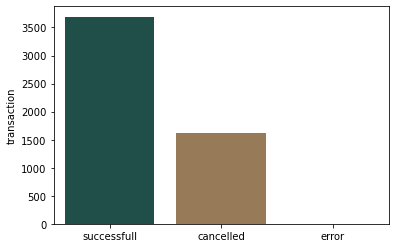

In [26]:
sns.barplot (x=trans_distr.index,y=transaction_data.transaction.value_counts(), 
             palette = 'cubehelix', alpha = 0.99, dodge=False)

In [ ]:
Сколько успешных транзакций осуществил каждый из пользователей? 
Постройте гистограмму распределения числа успешных транзакций.

In [40]:
transaction_successfull = transaction_data.query('transaction=="successfull"') \
                                            .groupby('name') \
                                            .agg({'transaction':'count'})
transaction_successfull

,transaction
name,
Ekaterina_Fedorova,72
Ekaterina_Ivanova,59
Ekaterina_Lesnova,63
Ekaterina_Ozerova,72
Ekaterina_Petrova,68
Ekaterina_Polyanova,68
Ekaterina_Smirnova,77
Irina_Fedorova,62
Irina_Ivanova,60


In [44]:
transaction_successfull.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


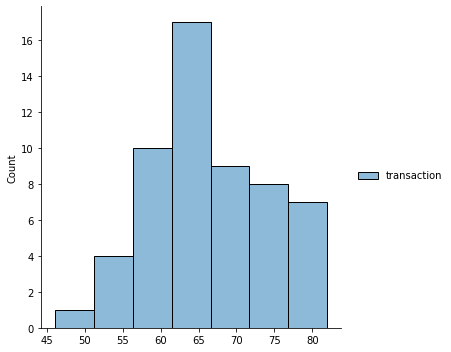

In [42]:
sns.displot(transaction_successfull)

In [ ]:

Коллега прислал Вам обновленные данные. (transaction_data_updated.csv)
Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена
пользователей, строк – минуты, значений – число совершенных операций в указанную минуту.
Пропущенные значения заполните нулями.


In [45]:
transaction_data_upd = pd.read_csv("C:/Users/yana2/Рабочий стол/transaction_data_updated.csv")

In [46]:
transaction_data_upd

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [ ]:
ads_data.groupby(['date','event'],as_index=False) \
        .agg({'ad_id':'count'}) \
        .pivot(index='date',columns='event', values='ad_id').reset_index()

In [66]:
user_vs_minute_pivot=transaction_data_upd.groupby(['name','minute'],as_index=False) \
                                        .agg({'transaction':'count'}) \
                                        .pivot(index='minute',columns='name',values='transaction').reset_index()
user_vs_minute_pivot

name,minute,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
0,0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,...,NaN,3.0,1.0,1.0,4.0,1.0,3.0,NaN,NaN,1.0
1,1,4.0,4.0,NaN,4.0,2.0,5.0,4.0,4.0,4.0,...,4.0,5.0,3.0,2.0,3.0,3.0,NaN,NaN,3.0,2.0
2,2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,...,4.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,3.0,1.0
3,3,3.0,NaN,2.0,NaN,5.0,2.0,1.0,3.0,2.0,...,1.0,5.0,5.0,2.0,4.0,NaN,3.0,4.0,1.0,NaN
4,4,3.0,NaN,NaN,3.0,1.0,1.0,2.0,3.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,1.0
5,5,3.0,NaN,2.0,3.0,1.0,NaN,5.0,3.0,1.0,...,NaN,2.0,3.0,1.0,NaN,NaN,3.0,NaN,2.0,1.0
6,6,4.0,1.0,2.0,2.0,NaN,4.0,5.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,NaN,2.0
7,7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,...,3.0,1.0,1.0,2.0,4.0,1.0,NaN,1.0,2.0,2.0
8,8,2.0,4.0,3.0,1.0,NaN,3.0,2.0,1.0,1.0,...,NaN,1.0,NaN,1.0,2.0,4.0,2.0,1.0,1.0,1.0
9,9,2.0,4.0,2.0,3.0,4.0,NaN,3.0,2.0,2.0,...,2.0,3.0,1.0,2.0,4.0,2.0,3.0,NaN,1.0,4.0


In [68]:
user_vs_minute_pivot.fillna(0,inplace=True)

In [64]:
#другой способ
user_vs_minute_pivot2 = transaction_data_upd.pivot_table(index='minute',
                                 columns='name',
                                values='transaction',
                                aggfunc='count', fill_value=0)
user_vs_minute_pivot2

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3,4,2,3,4,4,2,1,2,2,...,0,3,1,1,4,1,3,0,0,1
1,4,4,0,4,2,5,4,4,4,3,...,4,5,3,2,3,3,0,0,3,2
2,1,2,4,4,2,1,3,2,3,3,...,4,1,3,3,0,1,2,1,3,1
3,3,0,2,0,5,2,1,3,2,2,...,1,5,5,2,4,0,3,4,1,0
4,3,0,0,3,1,1,2,3,2,1,...,1,2,2,1,1,2,2,3,0,1
5,3,0,2,3,1,0,5,3,1,3,...,0,2,3,1,0,0,3,0,2,1
6,4,1,2,2,0,4,5,2,2,2,...,2,1,4,1,2,4,1,2,0,2
7,3,2,1,2,2,3,4,1,1,3,...,3,1,1,2,4,1,0,1,2,2
8,2,4,3,1,0,3,2,1,1,0,...,0,1,0,1,2,4,2,1,1,1


In [ ]:
Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, 
прошедших с начала дня, в колонку true_minute.

<AxesSubplot:>

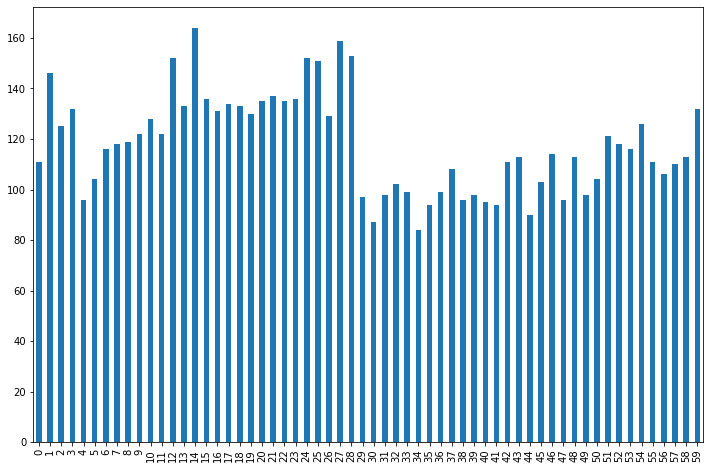

In [73]:
user_vs_minute_pivot.sum(axis=1).plot.bar(figsize=(12,8))

In [75]:
transaction_data_upd['date'] = pd.to_datetime(transaction_data_upd.date)

In [82]:
transaction_data_upd['true_minute'] = transaction_data_upd.date.dt.minute + transaction_data_upd.date.dt.hour *60

In [83]:
transaction_data_upd

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='true_minute', ylabel='count'>

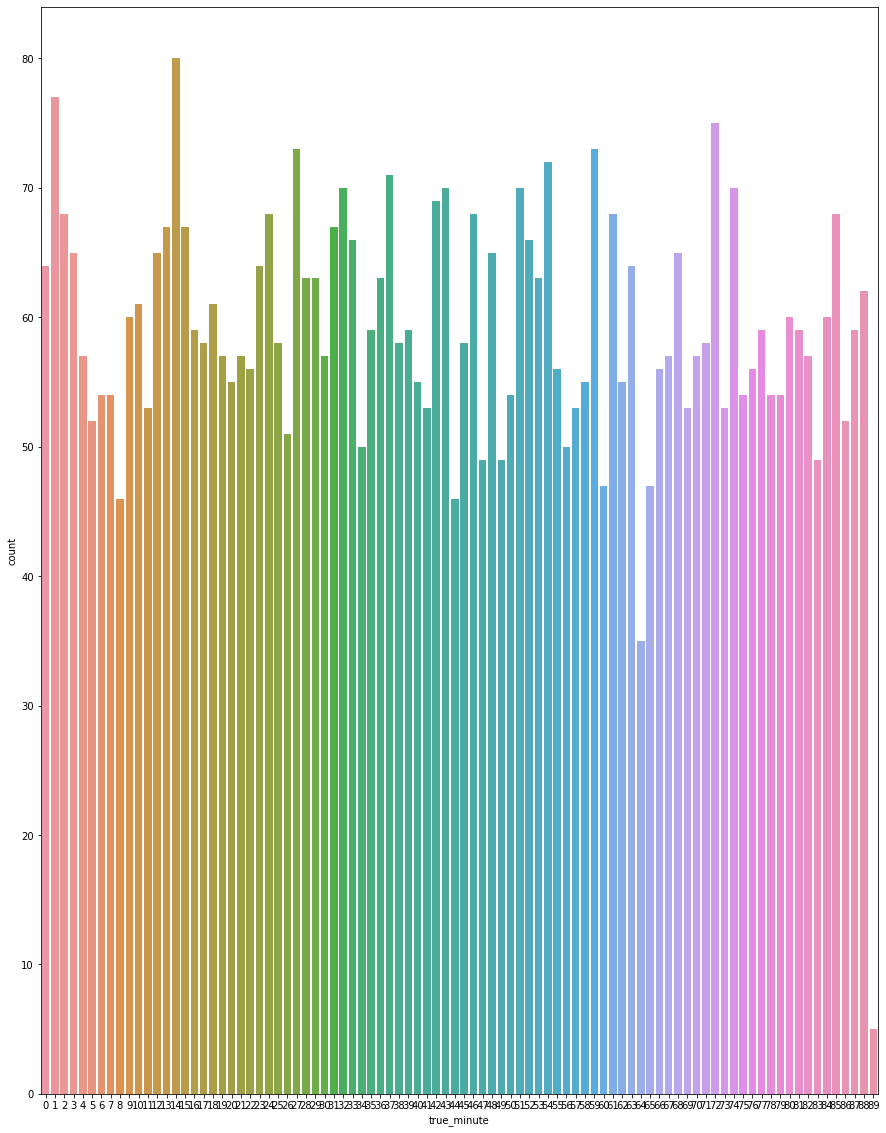

In [88]:
plt.figure(figsize=(15,20))
sns.countplot(transaction_data_upd['true_minute'])